# Data Profiling: Salary Survey Analysis
**Adriano Machado** (202105352)

## Introduction

This analysis focuses on data profiling of a Salary Survey dataset from [AskAManager.org](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html), which captures information on salaries across various industries, job titles, and countries. The data includes demographic information, job specifics, and compensation details, allowing for a comprehensive exploration of salary trends.

## Dataset Overview
The [dataset](https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?resourcekey=&gid=1625408792#gid=1625408792) comprises various features across several categories:

- **Demographic Information** (age, gender, race)
- **Job Details** (industry, job title, job context)
- **Compensation** (annual salary, additional compensation, currency)
- **Location** (country, state)
- **Experience & Education** (total professional experience, field experience, highest education level)
- **Additional Context** (income context, timestamp)

This dataset comprises **17 variables** and is continuously updated, offering a comprehensive view of salary trends across different roles, industries, and regions.
Our data profiling process will examine these features to uncover patterns, identify potential data quality issues, and provide insights into the dataset's structure and characteristics.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import webbrowser
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline



## 1. Loading Data

Let's start by loading the dataset and examining its structure.

In [25]:
df = pd.read_csv('data.csv', parse_dates=['Timestamp'])

In [26]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

The original dataset feature names are based on the survey [questions](https://docs.google.com/forms/d/e/1FAIpQLScAIJd3KBwvB_MfY_NzG7X3gOw-RDdB3np0Z0xqlcG7JZbrVg/viewform). To enhance clarity and make the data easier to work with, we will rename the columns to more concise and descriptive names.

In [27]:
df.columns = [
    'timestamp', 'age', 'industry', 'job_title', 'job_context', 'annual_salary', 
    'additional_compensation', 'currency', 'other_currency', 'income_context', 
    'country', 'state', 'city', 'total_experience', 'field_experience', 
    'education_level', 'gender', 'race'
]
df.head()

,timestamp,age,industry,job_title,job_context,annual_salary,additional_compensation,currency,other_currency,income_context,country,state,city,total_experience,field_experience,education_level,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Let's start by generating a profile report using *ydata_profiling* library. This report will be saved in the *output* folder as an HTML file.

In [28]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

If you want to open the profile report, run the following cell.

In [29]:
file_path = 'output.html'
webbrowser.open(file_path)

True

## 2. Metadata and Structure

### Dataset Statistics
By examining the profile report, we can gather the following insights:

- **Number of features:** 18
- **Number of records:** 28085
- **Missing cells:** 86795
- **Missing cells (%):** 17.2%
- **Duplicate rows:** 0
- **Duplicate rows (%):** 0%

### Analyzing Columns and Data Types


The following code snippet checks for columns in a DataFrame that contain mixed data types and prints the results.

In [30]:
mixed_type_columns = df.columns[df.apply(lambda col: col.dropna().map(type).nunique() > 1)].tolist()
if mixed_type_columns:
    print("\nColumns with Mixed Data Types:")
    for column in mixed_type_columns:
        print(f"\nColumn: {column}")
        print(df[column].dropna().map(type).value_counts())
else:
    print("\nNo columns with mixed data types found.")


No columns with mixed data types found.


After running this check, no columns were found to have mixed data types, ensuring consistency in the data types across each column.

Now, let's examine the percentage of missing values for each column.

In [31]:
for column in df.columns:
    total_count = len(df[column])
    nan_count = df[column].isna().sum()
    nan_percentage = (nan_count / total_count) * 100
    print(f"{column} -> {nan_percentage:.2f}% NaN")

timestamp -> 0.00% NaN
age -> 0.00% NaN
industry -> 0.26% NaN
job_title -> 0.00% NaN
job_context -> 74.12% NaN
annual_salary -> 0.00% NaN
additional_compensation -> 26.01% NaN
currency -> 0.00% NaN
other_currency -> 99.26% NaN
income_context -> 89.16% NaN
country -> 0.00% NaN
state -> 17.90% NaN
city -> 0.29% NaN
total_experience -> 0.00% NaN
field_experience -> 0.00% NaN
education_level -> 0.79% NaN
gender -> 0.61% NaN
race -> 0.63% NaN


**Findings:**
- **Complete Data:** Columns such as *timestamp*, *age*, *job_title*, *annual_salary*, *currency*, *country*, *total_experience*, and *field_experience* have no missing values.
- **Partial Missing Data:** Columns like *job_context*, *additional_compensation*, *other_currency*, *income_context*, and *state* contain missing values. This is expected, as these fields are optional, allowing respondents to provide more details only if relevant. For example:
  - **job_context** may only be filled in if the job title requires further explanation.
  - **additional_compensation** is only relevant for those who receive bonuses or other extra monetary benefits.
  - **other_currency** is used if the specified currency does not fit predefined options.
  - **state** is only applicable for U.S. respondents.
  - **income_context** provides additional context on the respondent's income.


### Data Quality Considerations for Open-Text Responses

The dataset includes several features with open-text responses, which may introduce variability and inconsistencies. These features are:

- **Job Title (*job_title*)**: Variations in titles, abbreviations, or spelling can lead to inconsistencies.
- **Job Context (*job_context*)**
- **Annual Salary (*annual_salary*)**: While this should generally follow a numerical format, discrepancies may arise due to formatting differences (e.g., commas).
- **Additional Compensation (*additional_compensation*)**: Similar to annual salary, variations in responses may affect analysis.
- **Other Currency (*other_currency*)**: Users may provide non-standard entries, necessitating validation and standardization.
- **Income Context (*income_context*)**: This field may include various formats and contexts, requiring thorough cleaning.
- **Country (*country*)**: Responses might differ in naming conventions (e.g., "USA" vs. "United States"), which could complicate analysis.
- **City (*city*)**: Inconsistent naming and potential misspellings could arise in this field. (e.g,"NY" vs. "New York")

To ensure the quality and usability of these open-text responses, we could employ data cleaning techniques such as:

- **Text normalization**
- **Validation**: Checking for inconsistencies or invalid entries.
- **Clustering**: Grouping similar responses to simplify analysis.

An example of this problem is the country column. As you can see below, there are at least 10 different ways to write 'United States.' Additionally, there is the issue of case sensitivity; for instance, 'japan' and 'Japan' are treated as different entries.

In [32]:
df['country'] = df['country'].str.lower()
df['country'].value_counts()

country
united states                9337
usa                          8573
us                           2754
canada                       1601
united states                 684
                             ... 
u.s.a                           1
united states of american       1
canadá                          1
croatia                         1
burma                           1
Name: count, Length: 311, dtype: int64

In [33]:
df['country'] = df['country'].str.strip()
df['country'] = df['country'].replace(['usa', 'america', 'the us', 'the united states', '🇺🇸', 'u.s.', 'us', 'united states of america', 'u.s.a.'], 'united states')
df['country'] = df['country'].replace(['uk'], 'united kingdom')

df['country'].value_counts()


country
united states     23039
canada             1678
united kingdom     1325
australia           389
germany             195
                  ...  
ibdia                 1
loutreland            1
ff                    1
myanmar               1
burma                 1
Name: count, Length: 249, dtype: int64

As you can see above, by doing a simple replacement of some of the ways of writing United States we increased the number of responses from 9337 to 23039, this shows how important it is to clean the data before doing any analysis.

Other column that has a problem is the annual salary, some of the values have ',' others '.' and some none of them. This would be a problem when converting the column to a numeric type.

In [34]:
cells_with_commas = df['annual_salary'].str.contains(',').sum()

cells_without_commas_or_periods = len(df['annual_salary']) - cells_with_commas

total_cells = len(df['annual_salary'])
percentage_with_commas = (cells_with_commas / total_cells) * 100
percentage_without_commas_or_periods = (cells_without_commas_or_periods / total_cells) * 100

print(f"Cells with Commas: {cells_with_commas} ({percentage_with_commas:.2f}%)")
print(f"Cells without Commas or Periods: {cells_without_commas_or_periods} ({percentage_without_commas_or_periods:.2f}%)")

Cells with Commas: 20302 (72.29%)
Cells without Commas or Periods: 7783 (27.71%)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28085 entries, 0 to 28084
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                28085 non-null  datetime64[ns]
 1   age                      28085 non-null  object        
 2   industry                 28011 non-null  object        
 3   job_title                28084 non-null  object        
 4   job_context              7267 non-null   object        
 5   annual_salary            28085 non-null  object        
 6   additional_compensation  20780 non-null  float64       
 7   currency                 28085 non-null  object        
 8   other_currency           207 non-null    object        
 9   income_context           3044 non-null   object        
 10  country                  28085 non-null  object        
 11  state                    23059 non-null  object        
 12  city                     28003 n

Lets convert annual salary to a numeric type. For that we'll need to remove the commas otherwise the conversion will fail.

In [36]:
df['annual_salary'] = df['annual_salary'].str.replace(',', '').astype(float)

df['annual_salary'].describe()


count    2.808500e+04
mean     3.612420e+05
std      3.620792e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.100000e+05
max      6.000070e+09
Name: annual_salary, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28085 entries, 0 to 28084
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                28085 non-null  datetime64[ns]
 1   age                      28085 non-null  object        
 2   industry                 28011 non-null  object        
 3   job_title                28084 non-null  object        
 4   job_context              7267 non-null   object        
 5   annual_salary            28085 non-null  float64       
 6   additional_compensation  20780 non-null  float64       
 7   currency                 28085 non-null  object        
 8   other_currency           207 non-null    object        
 9   income_context           3044 non-null   object        
 10  country                  28085 non-null  object        
 11  state                    23059 non-null  object        
 12  city                     28003 n

## 3. Relationship and Interaction analysis

### Correlation Analysis
We used Cramér's V to measure the strength of association between categorical variables. Cramér's V is an adaptation of the chi-squared test, providing a score between 0 (no association) and 1 (perfect association). This metric is particularly useful when dealing with non-numeric, categorical data, where traditional correlation metrics such as Pearson’s correlation are not applicable.



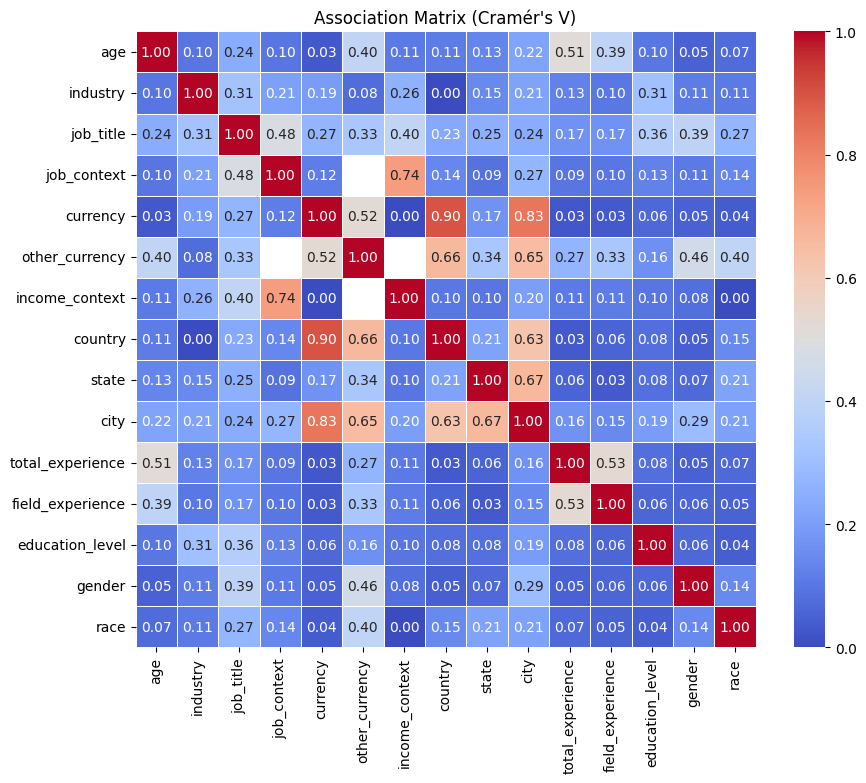

In [38]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return np.nan
    return np.sqrt(phi2corr / denominator)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
association_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            association_matrix.loc[col1, col2] = 1.0
        else:
            association_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

association_matrix = association_matrix.astype(float)
plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Association Matrix (Cramér\'s V)')
plt.show()

As we can see above, the correlation matrix provides valuable insights into the relationships between different variables in the dataset. Here are some key observations:

Strong Correlations (>0.7):
1. Currency & Country (0.90): Indicates a very strong relationship, which makes logical sense as countries typically have their own currencies
2. Job_context & Income_context (0.74): Suggests strong alignment between job context and income-related information
3. Currency & City (0.83): Shows that cities are strongly associated with specific currencies

Moderate Correlations (0.4-0.7):
1. Total_experience & Field_experience (0.53): Natural correlation between overall experience and field-specific experience
2. Other_currency & Income_context (0.66): Suggests some relationship between alternative currencies and income contexts
3. State & City (0.67): Expected moderate correlation between geographic locations

Interesting Patterns:
1. Demographic variables (gender, race) generally show weak correlations with professional variables
2. Geographic variables (country, state, city) show moderate to strong correlations with each other

### Imbalanced Data Analysis
We also examined the distribution of categorical variables to identify potential imbalances. Imbalanced data can skew analysis results and lead to biased conclusions. 

Gender Distribution:

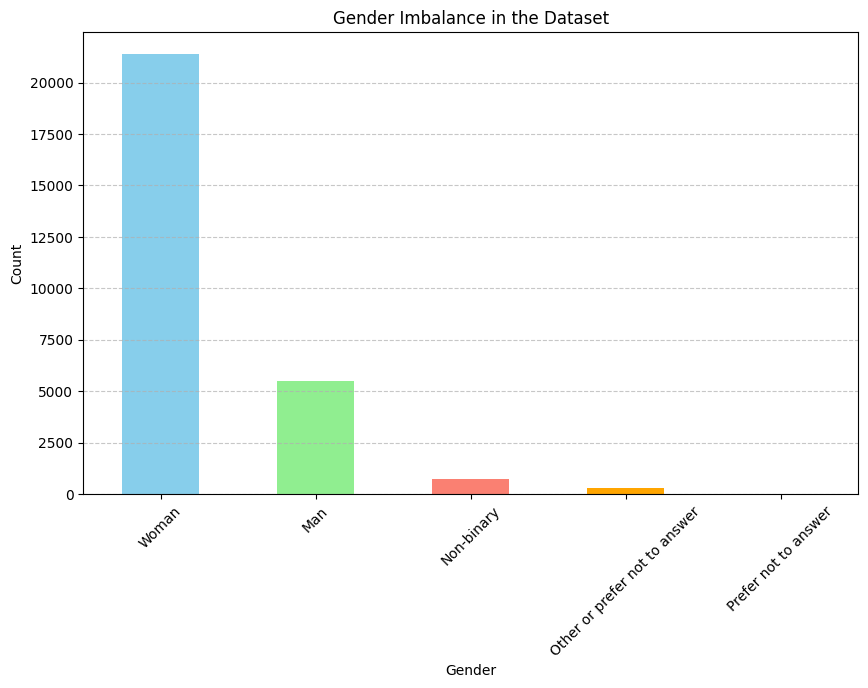

In [39]:

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('Gender Imbalance in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The dataset exhibits a notable gender distribution imbalance that requires careful consideration in subsequent analyses. Women constitute the majority with approximately 21,000 entries, significantly outnumbering men who represent roughly 5,500 entries (a 4:1 ratio). Non-binary individuals and those preferring not to specify their gender comprise a much smaller portion of the dataset, with approximately 800 and 300 entries respectively. This substantial imbalance could introduce bias in any derived insights or models, potentially overrepresenting female experiences while providing less reliable conclusions about other gender groups. When utilizing this dataset, appropriate statistical techniques such as weighting or stratified sampling should be employed to mitigate this bias and ensure more balanced and representative analyses.

Race Distribution:
For analyzing racial distribution in the dataset, a specialized approach was implemented to handle multiple racial identifications per individual. The data was processed using a custom counting function that splits comma-separated race entries, allowing each racial identity to be counted independently rather than treating multi-racial identifications as separate categories. Race names were truncated to two words for visualization clarity.

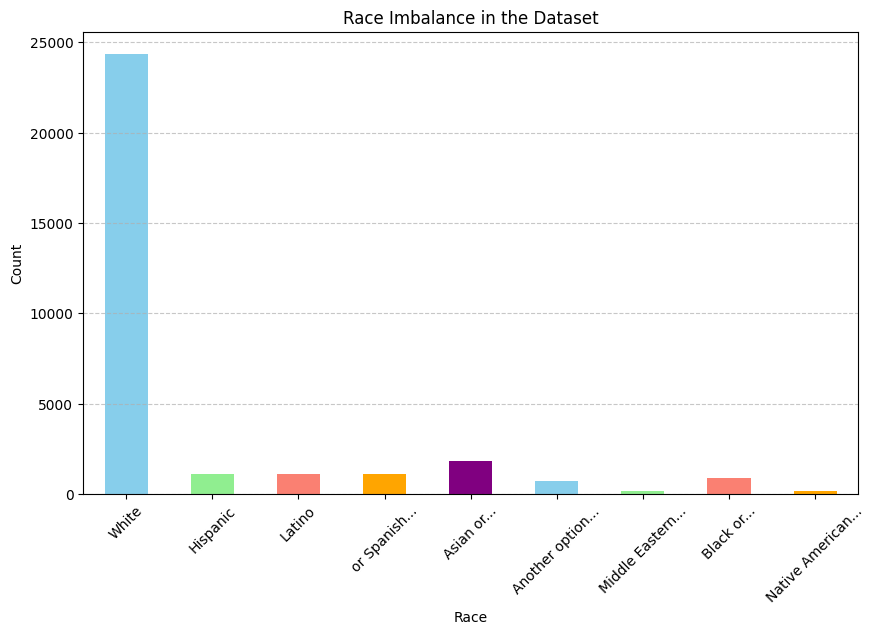

In [40]:

def split_and_count(series):
    counter = Counter()
    for item in series.dropna():
        options = item.split(',')
        counter.update([option.strip() for option in options])
    return pd.Series(counter)

race_counts = split_and_count(df['race'])

def truncate_label(label):
    words = label.split()
    if len(words) > 2:
        return ' '.join(words[:2]) + '...'
    return label

truncated_labels = race_counts.index.to_series().apply(truncate_label)

plt.figure(figsize=(10, 6))
race_counts.index = truncated_labels
race_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('Race Imbalance in the Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The racial distribution in the dataset shows a significant imbalance, with White individuals substantially overrepresented at approximately 24,000 entries. Other racial groups have markedly lower representation, with Hispanic, Latino, Spanish-origin, and Asian groups each showing counts between 1,000 and 2,000 entries. Middle Eastern, Black, and Native American identifications have the lowest representation in the dataset, with less than 1,000 entries each. This substantial skew towards White representation (roughly 80% of the dataset) should be carefully considered when drawing conclusions or developing models, as it may not reflect the true demographic diversity of the target population and could lead to biased analyses if not properly addressed through statistical methods.

Country Distribution:

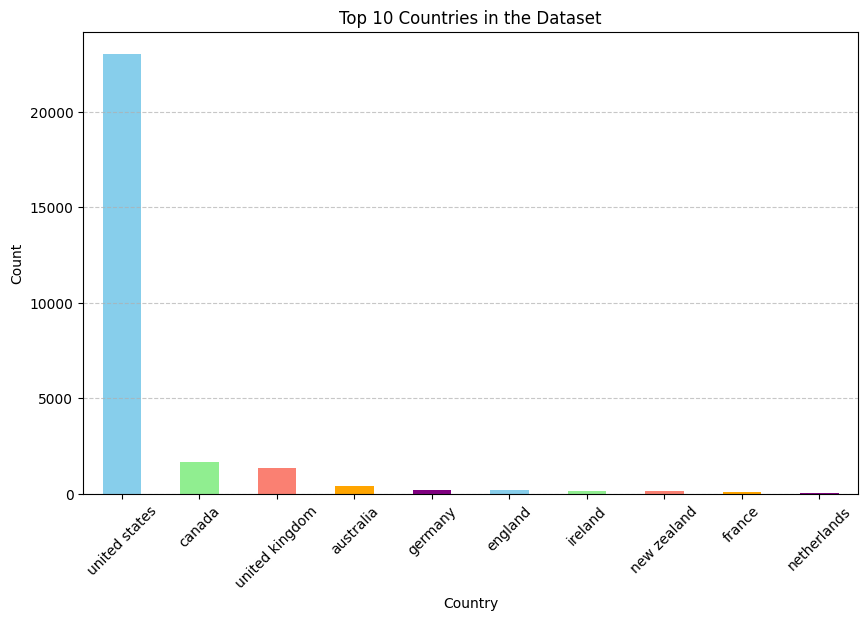

In [41]:

country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('Top 10 Countries in the Dataset')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The geographic distribution of the dataset reveals a strong US-centric bias, with the United States accounting for approximately 22,000 entries, dwarfing all other countries' representation. Canada and the United Kingdom form a distant second tier with roughly 1,500 and 1,000 entries respectively. The remaining countries (Australia, Germany, England, Ireland, New Zealand, France, and Netherlands) each contribute less than 500 entries to the dataset. This pronounced geographic imbalance suggests the dataset primarily reflects US employment patterns and practices, which may limit its applicability for global workforce analyses without appropriate statistical adjustments or acknowledgment of its geographic constraints.